In [27]:
import pandas as pd 
import os
l = [] 
l.append(['https://www.donga.com/news/Entertainment/List?ymd=20200804&m=', '1'])

df = pd.DataFrame(l, columns=['news_group', 'type'])  
if not os.path.exists('entertainnewsdate.csv'):  
    df.to_csv('entertainnewsdate.csv', index=False, mode='w', encoding='cp949')
else: 
    df.to_csv('entertainnewsdate.csv', index=False, mode='a', encoding='cp949', header = False) 

In [28]:
import pandas as pd 
import os
import requests
from bs4 import BeautifulSoup
df = pd.read_csv('entertainnewsdate.csv',encoding='cp949')
news_data = df[['news_group','type']].values.tolist()
for news_group, type in news_data:
    #print(url,type)
    if type==1:
        #동아일보에 맞는 크롤링 type이 1인경우
        webpage = requests.get(news_group)
        soup = BeautifulSoup(webpage.content, "html.parser", from_encoding='utf-8')
        link_data = soup.find_all('div',{'class':'rightList'})
        urllist = []
        for tag in link_data:
            if 'href' in tag.find('a').attrs:
                urllist.append([tag.find('a')['href'],1])
        df = pd.DataFrame(urllist,columns=['url','type'])
        if not os.path.exists('entertainurls.csv'):  
            df.to_csv('entertainurls.csv', index=False, mode='w', encoding='cp949')
        else: 
            df.to_csv('entertainurls.csv', index=False, mode='a', encoding='cp949', header = False) 

In [29]:
import requests
from bs4 import BeautifulSoup
df = pd.read_csv('entertainurls.csv',encoding='cp949')
news_data = df[['url','type']].values.tolist()
contentlist = []
for url, type in news_data:
    #print(url,type)
    if type==1:
        #print(url)
        #동아일보에 맞는 크롤링 type이 1인경우
        webpage = requests.get(url)
        soup = BeautifulSoup(webpage.content, "html.parser", from_encoding='utf-8')
        contents = soup.find('div',{'class':'article_txt'})
        title = soup.find('h1',{'class':'title'}).text
        for script in contents(['div',{'id':'bestnews_layer'}]):
            script.extract()
        #contents = re.sub('&nbsp;| |\t|\r|\n',' ',contents)
        contentlist.append([contents.text, title])
        
df = pd.DataFrame(contentlist,columns=['content','title'])
if not os.path.exists('entertainfinal.csv'):  
        df.to_csv('entertainfinal.csv', index=False, mode='w', encoding='utf-8-sig')
else: 
        df.to_csv('entertainfinal.csv', index=False, mode='a', encoding='utf-8-sig', header = False) 

In [22]:
import pandas as pd
df = pd.read_csv('entertainfinal.csv', encoding='utf-8-sig')  #파일 읽기
new_data=df['content'].values.tolist()
all_data='\n'.join(new_data)

#명사 추출
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(all_data)
stop_words=['위해','대해','우리','라며','때문','이번']
nouns = [n for n in nouns if not n in stop_words and len(n) > 1] #한글자수 빼기

#단어별 빈도수 계산
from collections import Counter
count=Counter(nouns)
tags = count.most_common(100)#명사 빈도수 상위100개 출력

print(tags)

C:\Users\ryu\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('아나운서', 17), ('지역', 17), ('김재우', 17), ('공개', 15), ('방송', 14), ('이야기', 14), ('지난', 13), ('스테파니', 13), ('조유리', 13), ('아이', 13), ('자신', 12), ('모습', 12), ('김민형', 11), ('사회', 11), ('소개', 10), ('영상', 10), ('시작', 9), ('소연', 9), ('추성훈', 9), ('아들', 9), ('또한', 8), ('상생', 8), ('최근', 8), ('고백', 8), ('아내', 8), ('김용림', 8), ('가장', 8), ('마음', 8), ('흥행', 8), ('코요태', 8), ('나이', 7), ('통해', 7), ('대학', 7), ('예정', 7), ('박상철', 7), ('브래디', 7), ('앤더슨', 7), ('출연', 7), ('이혜영', 7), ('데뷔', 7), ('공부', 7), ('화리', 7), ('여름', 7), ('대한', 6), ('그룹', 6), ('올해', 6), ('검사', 6), ('다시', 6), ('뉴스', 6), ('지금', 6), ('거리', 6), ('골목', 6), ('기획', 6), ('사진', 6), ('위로', 6), ('개봉', 6), ('신곡', 6), ('여자', 6), ('사실', 5), ('김대헌', 5), ('기업', 5), ('기자', 5), ('일화', 5), ('프로그램', 5), ('홍성군', 5), ('청운대', 5), ('동갑', 5), ('인스타그램', 5), ('가족', 5), ('웃음', 5), ('동상', 5), ('이몽', 5), ('영화', 5), ('반도', 5), ('전문가', 5), ('궁금증', 5), ('이수근', 5), ('덤디덤디', 5), ('젊음', 5), ('채널', 4), ('호반', 4), ('부사', 4), ('사람', 4), ('매출', 4), ('결과', 4), ('생각', 4), ('한번', 4)

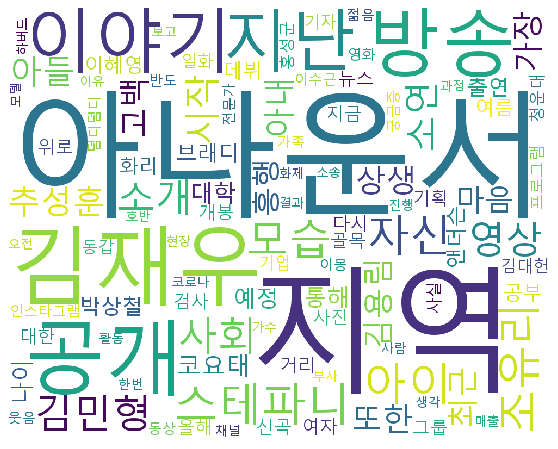

In [23]:
#워드클라우드를 이용한 단어 빈도수 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(font_path='c:/windows/fonts/malgun.ttf',background_color='white', width=1000, height=800)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [24]:
df = pd.read_csv('entertainfinal.csv', encoding='utf-8-sig')  #파일 읽기
news_data=df['title'].values.tolist()

#명사 추출
from konlpy.tag import Twitter
all_data=[]
for n in news_data:
    nlpy = Twitter()
    nouns = nlpy.nouns(n)
    stop_words=['위해','대해','우리','라며','때문','오후']
    nouns = [n for n in nouns if not n in stop_words and len(n) > 1] #한글자수 빼기
    nouns=' '.join(nouns)
    all_data.append(nouns)

#TF-IDF 계산
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF vectorizer
tfv = TfidfVectorizer(ngram_range = (1,1))
#Transformation
vec_text = tfv.fit_transform(all_data)
print(vec_text)

  (0, 22)	0.38425551511623257
  (0, 95)	0.38425551511623257
  (0, 105)	0.38425551511623257
  (0, 10)	0.38425551511623257
  (0, 16)	0.3377664794152205
  (0, 40)	0.38425551511623257
  (0, 94)	0.38425551511623257
  (1, 37)	0.33762465647464407
  (1, 110)	0.2967772409114767
  (1, 48)	0.33762465647464407
  (1, 108)	0.33762465647464407
  (1, 23)	0.33762465647464407
  (1, 5)	0.33762465647464407
  (1, 98)	0.33762465647464407
  (1, 64)	0.33762465647464407
  (1, 97)	0.33762465647464407
  (2, 115)	0.3779644730092272
  (2, 41)	0.3779644730092272
  (2, 87)	0.3779644730092272
  (2, 111)	0.3779644730092272
  (2, 44)	0.3779644730092272
  (2, 8)	0.3779644730092272
  (2, 35)	0.3779644730092272
  (3, 116)	0.49442758205235915
  (3, 66)	0.43460941260684216
  :	:
  (15, 63)	0.4472135954999579
  (15, 68)	0.4472135954999579
  (16, 117)	0.5773502691896257
  (16, 34)	0.5773502691896257
  (16, 102)	0.5773502691896257
  (17, 91)	0.3997361296670671
  (17, 73)	0.3997361296670671
  (17, 38)	0.3997361296670671
  (17, 

In [25]:
#Features
words = tfv.get_feature_names()
print(len(words))
print(words)

119
['개국', '개업', '검사', '결별', '고백', '골목', '공개', '공부', '과거', '국어', '김민형', '김보라', '김용림', '김재우', '나이', '남일우', '남친', '남편', '누가', '뉴스', '능통', '달라', '대시', '대장', '동상', '동안', '리듬', '리얼', '망고', '모델', '목표', '뮤지컬', '미녀', '바톤', '박문', '박상철', '반도', '방송', '배우', '베트남', '보유', '본인', '불꽃', '불덩어리', '불륜', '브래디', '비걸', '사랑', '상생', '생각', '생후', '서머', '서정희', '수재민', '스테파니', '시작', '식당', '신기록', '신장', '아기', '아들', '아빠', '아시아', '아이', '아침', '애플', '앤더슨', '에이스', '여자', '역대', '연상', '연애', '연예', '연지', '영화', '오뚜기', '옥주현', '용기', '원조', '원픽', '위로', '유재석', '윤은혜', '이몽', '이별', '이수근', '이진', '이혼소송', '이효리', '인증', '장난', '전속계약', '조병규', '조유리', '주식', '차례', '차이', '채널에이', '청운대', '추성훈', '추천', '코로나', '코요태', '쾌척', '클리', '톱스타', '파혼', '포즈', '프로젝트', '하버드', '현장', '현재', '홀로', '홍성흔', '홍화', '확인', '활약', '후보', '흥행']


In [17]:
#KMeans 계산                                                                           
from sklearn.cluster import KMeans
## K Means Clustering
kmeans = KMeans(n_clusters = 5, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200)                                                                
#Fitting
kmeans.fit(vec_text)
## Transforming Numbers Back To Words.
print(kmeans.cluster_centers_.argsort())
print(kmeans.cluster_centers_)
#kmeans.labels_

[[116  94  92  30  64  90  36  37  82  81  40  26  43  45  47  73  72  71
   52  53  54  70  66  75  95  91 105   2   3   5   6 113 107  10  96  13
  101  15  63  97  22  21  20  99  18   1  67  57 109  98  85 102  79  46
   84   4  93  77  59  83  23  69  74   0  61  35  56  38 115 112  16  17
   19  29  11  87 106 103  39   9  34  14  42   7 111  44  48   8 108 110
   51  24 104  27  78  89  88  86  76  65  28  31  58  80  41  49  60  25
   62  50  68  32 100  33  55 114  12]
 [  0  83  82  81  80  79  78  77  76  75  74  73  84  72  69  68  67  65
   64  63  62  61  60  59 115  71  85  86  87 114 112 111 110 109 108 107
  106 105 104 103 102 101 100  99  98  97  96  95  93  92  91  90  89  88
   57  56  58  27  26  25  24  23  22  21  20  19  18  17  16  55  14  11
   10   9   8   7   6   5   4   3   2   1  12  28 116  30  48  45  44  49
   50  29  51  42  41  46  40  52  38  37  36  35  34  33  32  31  39  47
   54  13  15  94 113  43  53  66  70]
 [  0  84  83  82  80  79  78  77 

In [26]:
## Transforming Numbers Back To Words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : 김용림, 홍화, 시작, 바톤, 추천, 미녀, 여자, 생후, 아시아, 동안
1 : 연상, 앤더슨, 수재민, 불덩어리, 홍성흔, 주식, 남일우, 김재우, 스테파니, 사랑
2 : 연예, 누가, 활약, 코로나, 브래디, 아침, 유재석, 대시, 능통, 서정희
3 : 포즈, 검사, 리듬, 채널에이, 추성훈, 공개, 톱스타, 차례, 차이, 골목
4 : 장난, 윤은혜, 보유, 활약, 망고, 목표, 뮤지컬, 미녀, 바톤, 박문
